# Chương 8: Phân nhóm và Phân đoạn thị trường (Cluster Analysis)

**Mục tiêu:** Phân chia một tập dữ liệu lớn thành các nhóm nhỏ (Clusters) sao cho các đối tượng trong cùng một nhóm có sự tương đồng cao nhất, và các đối tượng khác nhóm có sự khác biệt lớn nhất.

---

## 8.1. Dẫn nhập: Nghệ thuật thấu hiểu khách hàng

### Case Study: Trung tâm thương mại (Mall Customers)
Giám đốc Marketing của một trung tâm thương mại lớn có dữ liệu của 200 khách hàng thân thiết, bao gồm: Tuổi, Thu nhập hàng năm, và Điểm chi tiêu (Spending Score - chấm từ 1 đến 100 dựa trên hành vi mua sắm).

**Vấn đề:** Ông không thể gửi cùng một email quảng cáo cho tất cả mọi người. 
* Gửi mã giảm giá hàng hiệu cho người thu nhập thấp $\rightarrow$ Họ không mua nổi.
* Gửi mã giảm giá hàng bình dân cho người giàu $\rightarrow$ Họ thấy không đẳng cấp.

**Giải pháp:** Dùng thuật toán Phân cụm (Clustering) để tự động chia 200 khách này thành các phân khúc (Segments) riêng biệt, từ đó có chiến lược "đánh đâu thắng đó".

## 8.2. Cơ sở Lý thuyết

### 8.2.1. Học không giám sát (Unsupervised Learning)
Khác với Hồi quy hay Phân loại (có biến Y mục tiêu), Phân cụm **không có nhãn**. Chúng ta ném dữ liệu vào và bảo máy tính: *"Hãy tìm xem cấu trúc tự nhiên của đám dữ liệu này là gì?"*.

### 8.2.2. Các thuật toán phổ biến
1.  **Phân cụm phân cấp (Hierarchical Clustering):** Xây dựng một cây phả hệ (Dendrogram). Thích hợp khi dữ liệu nhỏ, muốn nhìn cấu trúc tổng thể.
2.  **K-Means (Phân cụm K trung bình):** Phổ biến nhất. 
    * Bước 1: Chọn ngẫu nhiên $K$ tâm cụm (Centroids).
    * Bước 2: Gán mỗi điểm dữ liệu vào tâm gần nhất.
    * Bước 3: Cập nhật lại vị trí tâm cụm bằng trung bình cộng của các điểm trong cụm.
    * Lặp lại cho đến khi tâm không đổi.

### 8.2.3. Làm sao biết chia mấy nhóm là tốt nhất?
Dùng phương pháp **Elbow Method (Khuỷu tay)**. Chúng ta vẽ đồ thị sai số (Inertia) theo số lượng cụm K. Điểm gập khúc (như khuỷu tay) chính là số cụm tối ưu.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# --- BƯỚC 1: GIẢ LẬP DỮ LIỆU MALL CUSTOMERS ---
np.random.seed(42)
n_customers = 200

# Tạo 5 nhóm khách hàng đặc trưng (để thuật toán sau này tìm lại)
# 1. Thu nhập thấp, Chi tiêu thấp (Tiết kiệm)
c1 = np.random.normal(loc=[25, 20], scale=[5, 10], size=(40, 2))
# 2. Thu nhập thấp, Chi tiêu cao (Sống ảo)
c2 = np.random.normal(loc=[25, 80], scale=[5, 10], size=(40, 2))
# 3. Thu nhập trung bình, Chi tiêu trung bình (Đại trà)
c3 = np.random.normal(loc=[55, 50], scale=[10, 10], size=(80, 2))
# 4. Thu nhập cao, Chi tiêu thấp (Đại gia kẹt xỉ)
c4 = np.random.normal(loc=[90, 20], scale=[10, 10], size=(20, 2))
# 5. Thu nhập cao, Chi tiêu cao (Khách VIP)
c5 = np.random.normal(loc=[90, 80], scale=[10, 10], size=(20, 2))

X = np.concatenate([c1, c2, c3, c4, c5])
df_mall = pd.DataFrame(X, columns=['Annual_Income_k$', 'Spending_Score'])

print("Dữ liệu khách hàng (5 dòng đầu):")
print(df_mall.head())

Dữ liệu khách hàng (5 dòng đầu):
   Annual_Income_k$  Spending_Score
0         27.483571       18.617357
1         28.238443       35.230299
2         23.829233       17.658630
3         32.896064       27.674347
4         22.652628       25.425600


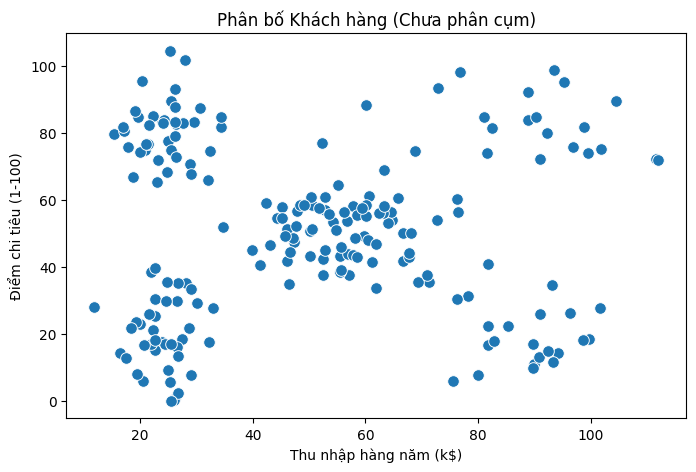

In [2]:
# --- BƯỚC 2: KHÁM PHÁ DỮ LIỆU (EDA) ---
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Annual_Income_k$', y='Spending_Score', data=df_mall, s=70)
plt.title('Phân bố Khách hàng (Chưa phân cụm)')
plt.xlabel('Thu nhập hàng năm (k$)')
plt.ylabel('Điểm chi tiêu (1-100)')
plt.show()

# Nhìn bằng mắt thường, ta đã thấy lờ mờ có 5 nhóm.

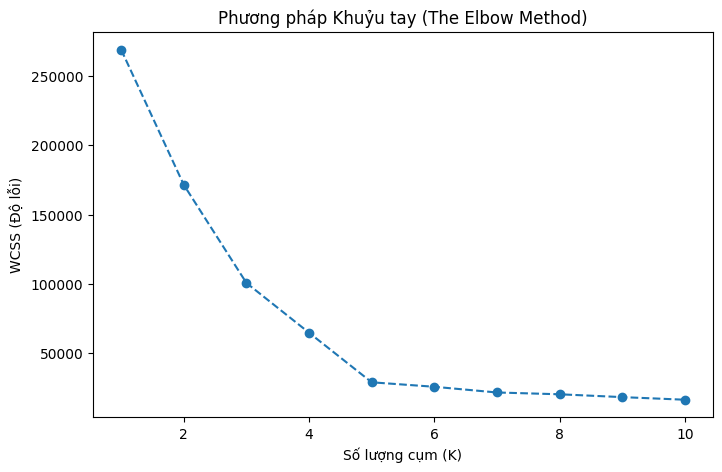

In [3]:
# --- BƯỚC 3: TÌM SỐ CỤM TỐI ƯU (ELBOW METHOD) ---
# Thử chạy K từ 1 đến 10 và đo độ lỗi (WCSS - Within Cluster Sum of Squares)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_mall)
    wcss.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Phương pháp Khuỷu tay (The Elbow Method)')
plt.xlabel('Số lượng cụm (K)')
plt.ylabel('WCSS (Độ lỗi)')
plt.show()

# NHẬN XÉT: 
# Đường gấp khúc mạnh nhất tại K=5. Sau K=5 độ lỗi giảm không đáng kể.
# -> Chọn K = 5 là tối ưu.

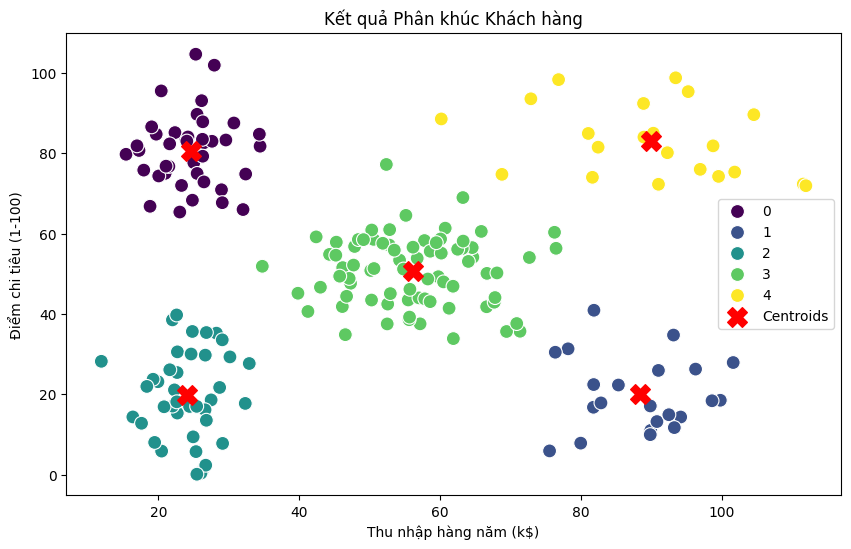

In [4]:
# --- BƯỚC 4: CHẠY K-MEANS VỚI K=5 ---
kmeans_final = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans_final.fit_predict(df_mall)

# Gán nhãn cụm vào DataFrame gốc để phân tích
df_mall['Cluster'] = y_kmeans

# --- BƯỚC 5: TRỰC QUAN HÓA KẾT QUẢ ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual_Income_k$', y='Spending_Score', hue='Cluster', 
                data=df_mall, palette='viridis', s=100, legend='full')

# Vẽ tâm cụm
centers = kmeans_final.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centroids')

plt.title('Kết quả Phân khúc Khách hàng')
plt.xlabel('Thu nhập hàng năm (k$)')
plt.ylabel('Điểm chi tiêu (1-100)')
plt.legend()
plt.show()

## 8.3. Ứng dụng Quản trị: Đặt tên và Hành động (Profiling)

Sau khi chạy thuật toán, việc của con người là "thổi hồn" vào các con số 0, 1, 2, 3, 4. Chúng ta phân tích đặc điểm trung bình của từng nhóm để đặt tên:

1.  **Nhóm VIP (Thu nhập cao, Chi tiêu cao):** Đây là "Mỏ vàng". $\rightarrow$ Chiến lược: Chăm sóc đặc biệt, mời sự kiện ra mắt sản phẩm độc quyền.
2.  **Nhóm Tiềm năng (Thu nhập cao, Chi tiêu thấp):** Có tiền nhưng chưa chịu chi. $\rightarrow$ Chiến lược: Tìm hiểu lý do (do dịch vụ tồi hay hàng hóa không hợp gu?), gửi voucher kích cầu cao cấp.
3.  **Nhóm Bình dân (Thu nhập trung bình, Chi tiêu trung bình):** Số lượng đông nhất. $\rightarrow$ Chiến lược: Khuyến mãi đại trà, tích điểm.
4.  **Nhóm Sống ảo (Thu nhập thấp, Chi tiêu cao):** Thường là giới trẻ. $\rightarrow$ Chiến lược: Cho trả góp, quảng cáo trendy.
5.  **Nhóm Tiết kiệm (Thu nhập thấp, Chi tiêu thấp):** $\rightarrow$ Chiến lược: Hàng giảm giá sâu.

---

## 8.4. Tổng kết Chương 8

1.  **K-Means** đơn giản, hiệu quả nhưng yêu cầu phải chuẩn hóa dữ liệu (nếu đơn vị khác nhau) và nhạy cảm với Outlier.
2.  **Elbow Method** là công cụ tiêu chuẩn để không phải đoán mò số lượng nhóm.
3.  Kết quả phân cụm chỉ có ý nghĩa khi bạn **đặt tên** và **ra quyết định** được trên từng cụm.

### Bài tập thực hành
Tìm bộ dữ liệu **CC GENERAL.csv** (Dữ liệu thẻ tín dụng) trên Kaggle.
* Thực hiện phân cụm khách hàng dựa trên `Balance` (Số dư nợ) và `Purchases` (Số tiền mua sắm).
* Thử dùng kỹ thuật **Hierarchical Clustering** để vẽ biểu đồ Dendrogram.